In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import statsmodels.formula.api as smf


In [2]:
df=pd.read_csv('diamonds.csv')
print(df.head(5))

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75


In [3]:
#Corroboramos valores nulos
valores_nulos=df.isnull().sum()
valores_nulos

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
dtype: int64

In [4]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =df.fillna(method="bfill") 
data1

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [5]:
#Corroboramos valores nulos
valores_nulos=data1.isnull().sum()
valores_nulos

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=data1
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

C:\Users\Alberto\AppData\Local\Temp\ipykernel_5064\467915764.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Superior= y.mean() + 3*y.std()


Limite superior permitido carat        2.219971
depth       66.047323
table       64.160802
price    15901.118931
x            9.096438
y            9.160950
z            5.655838
dtype: float64
Limite inferior permitido carat      -0.624087
depth      57.451550
table      50.753937
price   -8035.519450
x           2.365882
y           2.308123
z           1.421630
dtype: float64


C:\Users\Alberto\AppData\Local\Temp\ipykernel_5064\467915764.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Limite_Inferior= y.mean() - 3*y.std()


In [7]:
#Encontramos Ouliers del Dataframe
outliers= data1[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers

C:\Users\Alberto\AppData\Local\Temp\ipykernel_5064\1331139327.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers= data1[(y>Limite_Superior)|(y<Limite_Inferior)]


,carat,cut,color,clarity,depth,table,price,x,y,z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,56.9,65.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
53935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=data1.copy()
data_clean=data_clean.fillna(round(data1.mean(),1))
data_clean

C:\Users\Alberto\AppData\Local\Temp\ipykernel_5064\2070593417.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_clean=data_clean.fillna(round(data1.mean(),1))


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [9]:
data_clean

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [10]:

Vars_Indep= data_clean[['carat']]
Var_Dep= data_clean['price']


In [11]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [12]:
type(model)
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [13]:
model.score(X=Vars_Indep, y=Var_Dep)
#correlación entre carat y precio es de 0.85

0.8493238112990737

In [14]:
Vars_Indep= data_clean[['depth']]
Var_Dep= data_clean['price']

model= LinearRegression()

type(model)
model.fit(X=Vars_Indep, y=Var_Dep)

model.score(X=Vars_Indep, y=Var_Dep)

##correlación entre depth y precio es de 0.00011


0.00011351483785160266

In [15]:
Vars_Indep= data_clean[['table']]
Var_Dep= data_clean['price']

model= LinearRegression()

type(model)
model.fit(X=Vars_Indep, y=Var_Dep)

model.score(X=Vars_Indep, y=Var_Dep)

##correlación entre table y precio es de 0.016

0.016163451413260477

In [16]:
model=smf.ols(formula="price~carat +depth", data=data_clean).fit()
model.params

Intercept    4046.601278
carat        7765.137086
depth        -102.186039
dtype: float64

In [17]:
Form= 4046.601278 + 7765.137086*data_clean["carat"] + -102.186039 *data_clean["depth"]
data_clean.insert(loc=0, column='Predicciones', value=Form)
data_clean

,Predicciones,carat,cut,color,clarity,depth,table,price,x,y,z
0,-451.858591,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,-433.445066,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,18.197189,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,-77.917801,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,-14.582494,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,3424.588809,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3189.560919,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,3064.913989,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,4368.647546,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [18]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.536e+05
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:13:04   Log-Likelihood:            -4.7249e+05
No. Observations:               53940   AIC:                         9.450e+05
Df Residuals:                   53937   BIC:                         9.450e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4046.6013    286.210     14.139      0.000    3485.627    4607.575
carat       7765.1371     14.010    554.269      0.000    7737.678    7792.596
depth       -102.1860      4.635    -22.045      0.000    -111.271     -93.101
==============================================================================
Omnibus:                    14147.996   Durbin-Watson:                   0.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148205.645
Skew:                           0.962   Prob(JB):                         0.00
Kurtosis:                      10.889   Cond. No.                     2.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
coef_Correl= np.sqrt(0.851)
coef_Correl

0.9224966124599049

In [20]:
model1=smf.ols(formula="price~carat +table", data=data_clean).fit()
model1.params

Intercept    1962.853800
carat        7820.048915
table         -74.315956
dtype: float64

In [21]:
Form= 1962.853800 + 7820.048915*data_clean["carat"] + -74.315956 *data_clean["table"]
data_clean.insert(loc=0, column='Predicciones1.', value=Form)
data_clean

,Predicciones1.,Predicciones,carat,cut,color,clarity,depth,table,price,x,y,z
0,-325.912530,-451.858591,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,-928.209244,-433.445066,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,-1069.072090,18.197189,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,-79.657463,-77.917801,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,76.743516,-14.582494,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3357.279527,3424.588809,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3505.911439,3189.560919,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,2977.930680,3064.913989,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,4377.770419,4368.647546,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [22]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                 1.540e+05
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:13:05   Log-Likelihood:            -4.7243e+05
No. Observations:               53940   AIC:                         9.449e+05
Df Residuals:                   53937   BIC:                         9.449e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1962.8538    171.817     11.424      0.000    1626.092    2299.616
carat       7820.0489     14.225    549.730      0.000    7792.167    7847.931
table        -74.3160      3.018    -24.627      0.000     -80.231     -68.401
==============================================================================
Omnibus:                    13939.140   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           159375.955
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                      11.219   Cond. No.                     1.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
coef_Correl= np.sqrt(0.851)
coef_Correl

0.9224966124599049

In [24]:
model=smf.ols(formula="price~depth +table", data=data_clean).fit()
model.params

Intercept   -15082.879110
depth           82.229775
table          242.580487
dtype: float64

In [25]:
Form= -15082.879110 + 82.229775*data_clean["depth"] + 242.580487 *data_clean["table"]
data_clean.insert(loc=0, column='Predicciones2', value=Form)
data_clean

,Predicciones2,Predicciones1.,Predicciones,carat,cut,color,clarity,depth,table,price,x,y,z
0,3316.178837,-325.912530,-451.858591,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,4631.871142,-928.209244,-433.445066,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,5363.726742,-1069.072090,18.197189,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,4117.927096,-79.657463,-77.917801,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,4191.933894,76.743516,-14.582494,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3743.778969,3357.279527,3424.588809,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3447.746478,3505.911439,3189.560919,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,4635.979980,2977.930680,3064.913989,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,4101.481141,4377.770419,4368.647546,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     465.3
Date:                Fri, 23 Sep 2022   Prob (F-statistic):          4.64e-201
Time:                        16:13:05   Log-Likelihood:            -5.2331e+05
No. Observations:               53940   AIC:                         1.047e+06
Df Residuals:                   53937   BIC:                         1.047e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.508e+04   1004.701    -15.012      0.000   -1.71e+04   -1.31e+04
depth         82.2298     12.445      6.607      0.000      57.837     106.622
table        242.5805      7.979     30.402      0.000     226.941     258.220
==============================================================================
Omnibus:                    15208.344   Durbin-Watson:                   0.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34866.491
Skew:                           1.622   Prob(JB):                         0.00
Kurtosis:                       5.234   Cond. No.                     4.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
coef_Correl= np.sqrt(0.017)
coef_Correl

0.130384048104053

In [28]:
model=smf.ols(formula="price~x +y +z", data=data_clean).fit()
model.params

Intercept   -14113.053835
x             2790.398431
y              218.664666
z              225.982856
dtype: float64

In [29]:
Form= -14113.053835 + 2790.398431*data_clean["x"] + 218.664666 *data_clean["y"] + 225.982856 *data_clean["z"]
data_clean.insert(loc=0, column='Predicciones3', value=Form)
data_clean

,Predicciones3,Predicciones2,Predicciones1.,Predicciones,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1671.556322,3316.178837,-325.912530,-451.858591,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,-1896.711224,4631.871142,-928.209244,-433.445066,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,-1399.954601,5363.726742,-1069.072090,18.197189,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,-874.093976,4117.927096,-79.657463,-77.917801,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,-430.080493,4191.933894,76.743516,-14.582494,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3982.185615,3743.778969,3357.279527,3424.588809,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,3837.433177,3447.746478,3505.911439,3189.560919,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,3727.115555,4635.979980,2977.930680,3064.913989,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,5231.300153,4101.481141,4377.770419,4368.647546,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                 6.470e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:13:05   Log-Likelihood:            -4.8263e+05
No. Observations:               53940   AIC:                         9.653e+05
Df Residuals:                   53936   BIC:                         9.653e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.411e+04     41.763   -337.934      0.000   -1.42e+04    -1.4e+04
x           2790.3984     40.984     68.085      0.000    2710.069    2870.728
y            218.6647     31.563      6.928      0.000     156.802     280.528
z            225.9829     47.574      4.750      0.000     132.738     319.228
==============================================================================
Omnibus:                    18880.328   Durbin-Watson:                   0.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           144529.163
Skew:                           1.481   Prob(JB):                         0.00
Kurtosis:                      10.452   Cond. No.                         65.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
coef_Correl= np.sqrt(0.783)
coef_Correl

0.8848728722251575

In [32]:
model=smf.ols(formula="price~x +y +z +carat +depth", data=data_clean).fit()
model.params

Intercept    12195.414635
x            -1369.336100
y               97.586875
z               64.358148
carat        10614.511143
depth         -156.630684
dtype: float64

In [33]:
Form= 12195.414635 + -1369.336100*data_clean["x"] + 97.586875 *data_clean["y"] + 64.358148 *data_clean["z"] + 10614.511143 *data_clean["carat"] -156.630684 *data_clean["depth"]
data_clean.insert(loc=0, column='Predicciones4', value=Form)
data_clean

,Predicciones4,Predicciones3,Predicciones2,Predicciones1.,Predicciones,carat,cut,color,clarity,depth,table,price,x,y,z
0,139.873599,-1671.556322,3316.178837,-325.912530,-451.858591,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,254.630565,-1896.711224,4631.871142,-928.209244,-433.445066,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,724.500976,-1399.954601,5363.726742,-1069.072090,18.197189,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,330.710975,-874.093976,4117.927096,-79.657463,-77.917801,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,229.759931,-430.080493,4191.933894,76.743516,-14.582494,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,3228.388414,3982.185615,3743.778969,3357.279527,3424.588809,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,2956.401534,3837.433177,3447.746478,3505.911439,3189.560919,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,2822.131611,3727.115555,4635.979980,2977.930680,3064.913989,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,3997.979807,5231.300153,4101.481141,4377.770419,4368.647546,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 6.429e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:13:05   Log-Likelihood:            -4.7145e+05
No. Observations:               53940   AIC:                         9.429e+05
Df Residuals:                   53934   BIC:                         9.430e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.22e+04    367.642     33.172      0.000    1.15e+04    1.29e+04
x          -1369.3361     43.477    -31.495      0.000   -1454.552   -1284.120
y             97.5869     25.765      3.788      0.000      47.088     148.086
z             64.3581     44.751      1.438      0.150     -23.354     152.070
carat       1.061e+04     63.807    166.355      0.000    1.05e+04    1.07e+04
depth       -156.6307      5.377    -29.130      0.000    -167.169    -146.092
==============================================================================
Omnibus:                    14207.637   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           354229.585
Skew:                           0.705   Prob(JB):                         0.00
Kurtosis:                      15.475   Cond. No.                     3.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
coef_Correl= np.sqrt(0.856)
coef_Correl

0.9252026804976302

In [36]:
model=smf.ols(formula="price~x +y +z +carat +depth +table", data=data_clean).fit()
model.params

Intercept    20847.314314
x            -1315.296678
y               66.379164
z               41.790048
carat        10685.092821
depth         -203.152505
table         -102.448266
dtype: float64

In [37]:
Form= 20847.314314 + -1315.296678*data_clean["x"] + 66.379164 *data_clean["y"] + 41.790048*data_clean["z"] + 10685.092821*data_clean["carat"] -203.152505 *data_clean["depth"] -102.448266 *data_clean["depth"]
data_clean.insert(loc=0, column='Predicciones5', value=Form)
data_clean

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1.,Predicciones,carat,cut,color,clarity,depth,table,price,x,y,z
0,-319.244742,139.873599,-1671.556322,3316.178837,-325.912530,-451.858591,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,51.184624,254.630565,-1896.711224,4631.871142,-928.209244,-433.445066,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,955.948455,724.500976,-1399.954601,5363.726742,-1069.072090,18.197189,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,-257.051236,330.710975,-874.093976,4117.927096,-79.657463,-77.917801,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,-489.551303,229.759931,-430.080493,4191.933894,76.743516,-14.582494,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,2925.707522,3228.388414,3982.185615,3743.778969,3357.279527,3424.588809,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,2305.676663,2956.401534,3837.433177,3447.746478,3505.911439,3189.560919,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,2216.377895,2822.131611,3727.115555,4635.979980,2977.930680,3064.913989,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,3501.586877,3997.979807,5231.300153,4101.481141,4377.770419,4368.647546,0.86,Premium,H,SI2,62.2,58.0,2757.0,6.15,6.12,3.74


In [38]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 5.486e+04
Date:                Fri, 23 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:13:05   Log-Likelihood:            -4.7090e+05
No. Observations:               53940   AIC:                         9.418e+05
Df Residuals:                   53933   BIC:                         9.419e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.085e+04    447.549     46.581      0.000       2e+04    2.17e+04
x          -1315.2967     43.071    -30.538      0.000   -1399.715   -1230.878
y             66.3792     25.523      2.601      0.009      16.355     116.404
z             41.7900     44.306      0.943      0.346     -45.049     128.629
carat       1.069e+04     63.200    169.068      0.000    1.06e+04    1.08e+04
depth       -203.1525      5.504    -36.910      0.000    -213.940    -192.365
table       -102.4483      3.084    -33.216      0.000    -108.494     -96.403
==============================================================================
Omnibus:                    14092.256   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           373314.711
Skew:                           0.674   Prob(JB):                         0.00
Kurtosis:                      15.817   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
coef_Correl= np.sqrt(0.859)
coef_Correl

0.9268225288586807

<AxesSubplot:xlabel='carat', ylabel='price'>

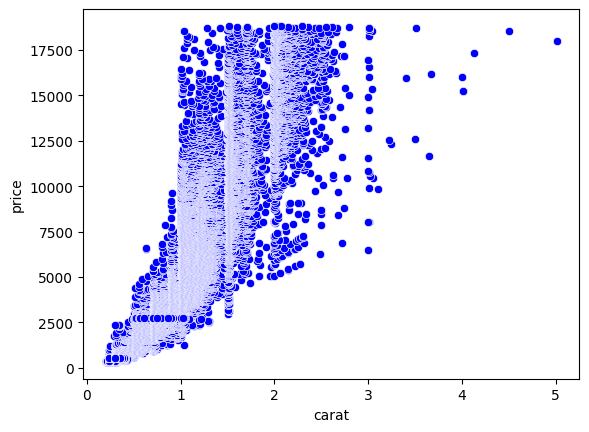

In [40]:
from turtle import color


sns.scatterplot(x='carat', y='price', color="blue", data=data_clean)

<AxesSubplot:xlabel='depth', ylabel='price'>

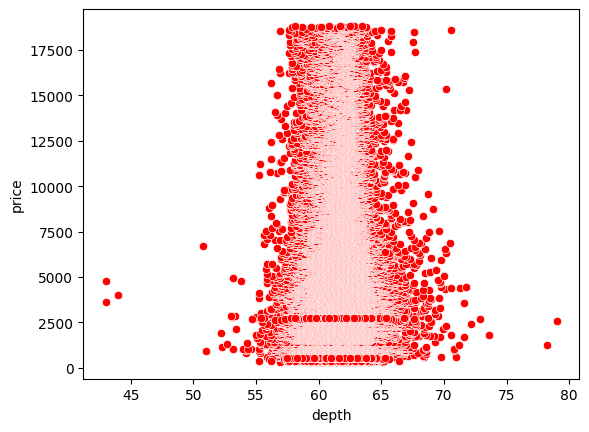

In [41]:
sns.scatterplot(x='depth', y='price', color="red", data=data_clean)

<AxesSubplot:xlabel='table', ylabel='price'>

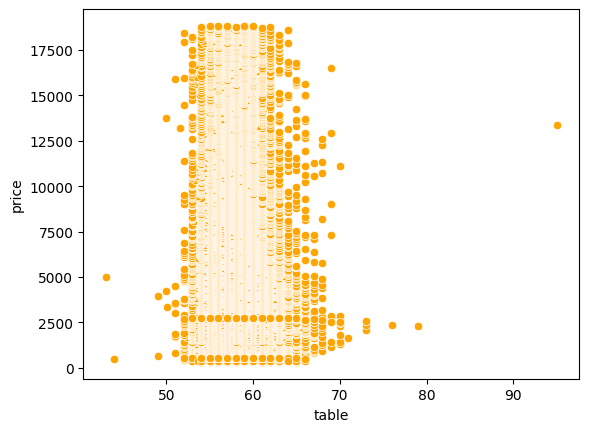

In [42]:
sns.scatterplot(x='table', y='price', color="orange", data=data_clean)

In [43]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors=df.corr()
Corr_Factors

,carat,depth,table,price,x,y,z
carat,1.000000,0.028228,0.181644,0.921592,0.975095,0.951722,0.953387
depth,0.028228,1.000000,-0.295777,-0.010678,-0.025280,-0.029338,0.094927
table,0.181644,-0.295777,1.000000,0.127169,0.195358,0.183782,0.150965
price,0.921592,-0.010678,0.127169,1.000000,0.884437,0.865424,0.861247
x,0.975095,-0.025280,0.195358,0.884437,1.000000,0.974701,0.970771
y,0.951722,-0.029338,0.183782,0.865424,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150965,0.861247,0.970771,0.952005,1.000000


In [44]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,carat,depth,table,price,x,y,z
carat,1.000000,0.028228,0.181644,0.921592,0.975095,0.951722,0.953387
depth,0.028228,1.000000,0.295777,0.010678,0.025280,0.029338,0.094927
table,0.181644,0.295777,1.000000,0.127169,0.195358,0.183782,0.150965
price,0.921592,0.010678,0.127169,1.000000,0.884437,0.865424,0.861247
x,0.975095,0.025280,0.195358,0.884437,1.000000,0.974701,0.970771
y,0.951722,0.029338,0.183782,0.865424,0.974701,1.000000,0.952005
z,0.953387,0.094927,0.150965,0.861247,0.970771,0.952005,1.000000


<AxesSubplot:>

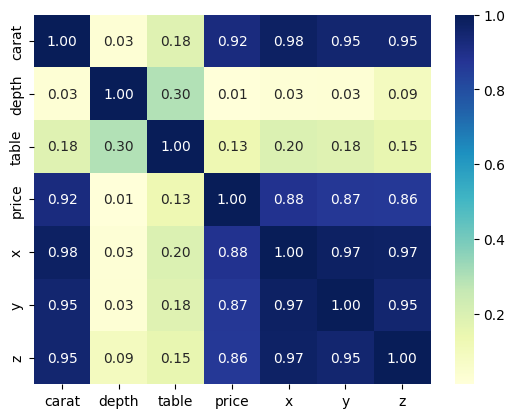

In [45]:
#Ajustamos el mapa de calor de los coeficientes de correlación 
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

In [46]:
#tabla comparativa
# carat y price: 0.92 ------------  Correlación fuerte positiva MEJOR MODELO
# depth y price: 0.01 Correlación inexistente
# table y price: 0.13 Correlación muy baja
# carat, depth y price: 0.92 --------- Correlación fuerte positiva
# carat, table y price: 0.92 --------- Correlación fuerte y positiva.
# depth, table y price: 0.13 Correlación débil 
# x,y,z y price: 0.88 Correlación fuerte
# x,y,z, carat , depth y price: 0.93 ---------- Mejor correlación (fuerte), positiva. 
# x,y,z, carat, depth, table y price: 0.93 ------- Mejor correlación (fuerte), positiva

#La variable que mayor relación tiene con el precio es"carat" de 0.92. De misma manera existe otro modelo con la misma correlación y son con las variables x,y,z, carat , depth y table con price. Mayor correlación puede llevar a un modelo a ser más certero para pronósticos.  
#Sin embargo, por complejidad del modelo, el mejor es en aquel que toma solo la variable carat basándnos únicamente en la correlación. 